# Comparative analysis between Abstractive and Extractive Summarization Techniques 

In [1]:
# !pip install rouge 
# !pip install --upgrade keras
# pip install spacy 

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation 
from heapq import nlargest
from rouge import Rouge
import spacy
nlp = spacy.load('en_core_web_sm')

# Content



1.   Extractive Summarization using word frequency count.
2.   Dataset preprocessing.
3.   Abstractive summarization with Attention mechanism (using GRU, LSTM, Bi-directional LSTM) and Evaluation. 
4.   Conclusion.  




# Main prerequisites for the summarization task

- Keras == 2.3.1
- Tensorflow == 2.2.0 
- Spacy == 2.2.4

### Example about extractive summarization from wikipedia

"`There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on`. The first is `generic summarization`, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is `query relevant summarization`, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs."

In [ ]:
text = '''There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.'''
reference = '''There are two types of extractive summarization tasks, the generic and query relevant summarization.'''
doc = nlp(text)

In [ ]:
#Extract tokens 
def tokenize(doc):
    tokens = [token.text for token in doc]
    return tokens

print(tokenize(doc))   

['There', 'are', 'broadly', 'two', 'types', 'of', 'extractive', 'summarization', 'tasks', 'depending', 'on', 'what', 'the', 'summarization', 'program', 'focuses', 'on', '.', 'The', 'first', 'is', 'generic', 'summarization', ',', 'which', 'focuses', 'on', 'obtaining', 'a', 'generic', 'summary', 'or', 'abstract', 'of', 'the', 'collection', '(', 'whether', 'documents', ',', 'or', 'sets', 'of', 'images', ',', 'or', 'videos', ',', 'news', 'stories', 'etc', '.', ')', '.', 'The', 'second', 'is', 'query', 'relevant', 'summarization', ',', 'sometimes', 'called', 'query', '-', 'based', 'summarization', ',', 'which', 'summarizes', 'objects', 'specific', 'to', 'a', 'query', '.', 'Summarization', 'systems', 'are', 'able', 'to', 'create', 'both', 'query', 'relevant', 'text', 'summaries', 'and', 'generic', 'machine', '-', 'generated', 'summaries', 'depending', 'on', 'what', 'the', 'user', 'needs', '.']


In [ ]:
# add end of line string to the punctuation list 
#convert the imported stopwords into a list of tokens
punctuation = punctuation + '\n'
stopwords = list(STOP_WORDS)
print(punctuation,stopwords)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
 ['meanwhile', 'however', 'throughout', 'one', 'seem', 'am', 'show', 'someone', 'more', 'next', 'indeed', 'becomes', 'onto', 'for', 'enough', 'rather', 'i', 'serious', 'together', "'s", 'hers', 'may', 'thereafter', 'again', 'here', 'sometimes', 'almost', 'anyone', 'six', 'still', 'twelve', 'will', 're', 'its', 'top', 'so', 'whereupon', 'many', 'via', '‘d', 'above', 'anyhow', 'make', 'namely', 'less', 'whenever', 'whereas', 'herein', 'both', 'really', 'noone', 'side', 'them', 'therein', 'through', 'the', 'which', 'except', 'thereupon', 'under', 'you', 'themselves', '‘ll', 'former', 'eleven', 'whither', 'we', 'because', 'other', 'often', '’m', 'they', 'do', 'go', 'using', 'what', "'ll", 'a', 'should', 'ten', 'by', 'four', 'on', 'last', 'if', 'each', "n't", 'third', 'used', 'everything', 'regarding', 'any', 'it', 'just', 'can', 'seemed', 'done', 'beyond', 'that', 'must', 'seeming', 'those', 'wherever', 'become', 'anything', 'ca', 'towards', 'within', "'re"

In [ ]:
#Create a dictionary of word counts from the given text
def return_word_frequencies(doc): 
    word_frequencies = {}
    for word in doc: 
        if word.text.lower() not in stopwords:
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys(): 
                    word_frequencies[word.text] = 1 

                else: 
                    word_frequencies[word.text] += 1 
                    
    return word_frequencies

word_frequencies = return_word_frequencies(doc)
print(word_frequencies)


{'broadly': 1, 'types': 1, 'extractive': 1, 'summarization': 5, 'tasks': 1, 'depending': 2, 'program': 1, 'focuses': 2, 'generic': 3, 'obtaining': 1, 'summary': 1, 'abstract': 1, 'collection': 1, 'documents': 1, 'sets': 1, 'images': 1, 'videos': 1, 'news': 1, 'stories': 1, 'etc': 1, 'second': 1, 'query': 4, 'relevant': 2, 'called': 1, 'based': 1, 'summarizes': 1, 'objects': 1, 'specific': 1, 'Summarization': 1, 'systems': 1, 'able': 1, 'create': 1, 'text': 1, 'summaries': 2, 'machine': 1, 'generated': 1, 'user': 1, 'needs': 1}


In [ ]:
#return the maximum frequency occured, to be used for normalization 
def return_maximum_frequency(word_frequencies):
    return max(word_frequencies.values())

max_frequency = return_maximum_frequency(word_frequencies)
print(max_frequency)

5


In [ ]:
#normalize the word frequency count 
def normalize_word_frequencies(word_frequencies):
    max_frequency = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = word_frequencies[word]/max_frequency
        
    return word_frequencies

word_frequencies = normalize_word_frequencies(word_frequencies)
word_frequencies

{'Summarization': 0.2,
 'able': 0.2,
 'abstract': 0.2,
 'based': 0.2,
 'broadly': 0.2,
 'called': 0.2,
 'collection': 0.2,
 'create': 0.2,
 'depending': 0.4,
 'documents': 0.2,
 'etc': 0.2,
 'extractive': 0.2,
 'focuses': 0.4,
 'generated': 0.2,
 'generic': 0.6,
 'images': 0.2,
 'machine': 0.2,
 'needs': 0.2,
 'news': 0.2,
 'objects': 0.2,
 'obtaining': 0.2,
 'program': 0.2,
 'query': 0.8,
 'relevant': 0.4,
 'second': 0.2,
 'sets': 0.2,
 'specific': 0.2,
 'stories': 0.2,
 'summaries': 0.4,
 'summarization': 1.0,
 'summarizes': 0.2,
 'summary': 0.2,
 'systems': 0.2,
 'tasks': 0.2,
 'text': 0.2,
 'types': 0.2,
 'user': 0.2,
 'videos': 0.2}

In [ ]:
#create tokens of sentences
def tokenize_sentences(doc):
    sentence_tokens = [sent for sent in doc.sents]
    
    return sentence_tokens

sentence_tokens = tokenize_sentences(doc)
sentence_tokens

[There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.]

In [ ]:
# Give each sentence a score based on the sum of normalized word counts 
def return_sentence_scores(sentence_tokens):
    sentence_score = {}
    for sent in sentence_tokens: 
        for word in sent: 
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_score.keys(): 
                    sentence_score[sent] =  word_frequencies[word.text.lower()]
                else: 
                    sentence_score[sent] +=  word_frequencies[word.text.lower()]
                    
                    
    return sentence_score
sentence_score = return_sentence_scores(sentence_tokens)
sentence_score

{There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.: 3.8000000000000003,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).: 4.800000000000002,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.: 6.000000000000001,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.: 5.600000000000001}

In [ ]:
# defince a percentage, and use it to extract the sentences with the highest scores. 
def return_summary(sentence_tokens,sentence_score,percentage=0.3):
    select_length = int(len(sentence_tokens)*percentage)
    summary = nlargest(select_length,sentence_score,key = sentence_score.get)
    summary = [word.text for word in summary]
    summary = ' '.join(summary)
    return summary

summary = return_summary(sentence_tokens,sentence_score,percentage=0.3)
summary

'The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.'

# Extractive text summarizer as a class

In [ ]:
class Summarizer():
    def __init__(self,text):
        self.text = text
        self.doc = nlp(text)
        self.punctuation = punctuation + '\n'
        self.stopwords = list(STOP_WORDS)
        self.word_frequencies = {}
        self.sentence_score = {}
        self.sentence_tokens = []
        
        
        
    def tokenize(self):
        tokens = [token.text for token in self.doc]
        return tokens
    
    
    def tokenize_sentences(self):
        self.sentence_tokens = [sent for sent in self.doc.sents]
    
        pass

    
    def return_word_frequencies(self): 
        
        for word in self.doc: 
            if word.text.lower() not in self.stopwords:
                if word.text.lower() not in self.punctuation:
                    if word.text not in self.word_frequencies.keys(): 
                        self.word_frequencies[word.text] = 1 

                    else: 
                        self.word_frequencies[word.text] += 1

        pass
    

    def normalize_word_frequencies(self):
        max_frequency = max(self.word_frequencies.values())
        for word in self.word_frequencies.keys():
            self.word_frequencies[word] = self.word_frequencies[word]/max_frequency

        pass
    
  
    def return_sentence_scores(self):
        
        for sent in self.sentence_tokens: 
            for word in sent: 
                if word.text.lower() in self.word_frequencies.keys():
                    if sent not in self.sentence_score.keys(): 
                        self.sentence_score[sent] =  self.word_frequencies[word.text.lower()]
                    else: 
                        self.sentence_score[sent] +=  self.word_frequencies[word.text.lower()]


        pass


    def summarize(self,percentage=0.3): 
        tokens = self.tokenize()
        self.return_word_frequencies()
        self.normalize_word_frequencies()
        self.tokenize_sentences()
        
        self.return_sentence_scores()
        select_length = int(len(self.sentence_tokens)*percentage)
        if select_length < 1: 
          select_length = 1 
        summary = nlargest(select_length,self.sentence_score,key = self.sentence_score.get)
        summary = [word.text for word in summary]
        summary = ' '.join(summary)
        
        return text,summary 

# Testing Extractive Summarizer

In [ ]:
ts = Summarizer(text)
text,summary = ts.summarize(0.2)

In [ ]:
print("Text:",text)
print("Summary:",summary)

Text: There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
Summary: The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.


In [ ]:
text = 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'
ts = Summarizer(text)
text,summary = ts.summarize()
print("Text:",text)
print("Summary:",summary)

Text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Summary: The product looks more like a stew than a processed meat and it smells better.


In [ ]:
text = 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'
reference = "Not as advertised"
text,summary = ts.summarize()
ts = Summarizer(text)
print("Text:",text)
print("Summary:",summary)
print("True Summary:",reference)

Text: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Summary: Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
True Summary: Not as advertised


# Abstractive Summarizer 

Abstractive summarizers tend to summarize a given information in a human-like approach. 

1.   Encoder-Decoder with GRU and Attention layer.  
2.   Encoder-Decoder with LSTM and Attention layer.
3.   Encoder-Decoder with Bi-Directional LSTM and Attention layer.





# Amazon Food Reviews Dataset 

For the abstractive summarizers, this dataset is used for training and testing.This dataset contains around 500,000 review with their labels as written summaries.
- To download the dataset in csv format [here](https://www.kaggle.com/snap/amazon-fine-food-reviews). 

- A sample of 100,000 review will be used in this project for computational efficiencies. 

In [ ]:
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("./drive/My Drive/amazon_food_review_data/Reviews.csv",nrows=100000)
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."


# Computational Aspects: 
- Google Colab with GPU runtime setting is used. 

# Preprocessing:

# Drop Duplicates and NA values

In [ ]:
data.drop_duplicates(subset=['Text'],inplace=True)#dropping duplicates
data.dropna(axis=0,inplace=True)#dropping na

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
#remove stop words 
    newString = text.lower()
#remove HTML tags 
    newString = BeautifulSoup(newString, "lxml").text
#remove texts inside parthesis
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)

#apply contraction mapping 
    #Apply contraction mapping by replacing each word in the key with the corresponding value 
    contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                            "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                            "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                            "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                            "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                            "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                            "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                            "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                            "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                            "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                            "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                            "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                            "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                            "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                            "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                            "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                            "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                            "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                            "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                            "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                            "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                            "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                            "you're": "you are", "you've": "you have"}
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])  

    #remove 's from plural words
    newString = re.sub(r"'s\b","",newString)

    #remove non alphabetic words 
    newString = re.sub("[^a-zA-Z]", " ", newString) 

    #remove short words 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#clean reviews 
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0)) 

In [ ]:
#preview cleaned text
cleaned_text[:5]  

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [ ]:
#clean summary 
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [ ]:
cleaned_summary[:10]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great just as good as the expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

In [ ]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

# Drop empty rows

In [ ]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

# Selecting the maximum length of input and output sequences



-   Selection is based on finding `Histogram` of sequences lengths in `Texts` and `Summaries`.




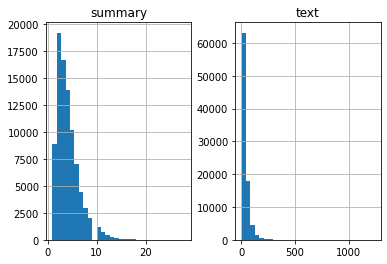

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

- From the histograms above, we can see that most sentences tend to have a length of eight words while summaries have mostly a length of 30.

In [ ]:
max_text_len=30
max_summary_len=8

# Include reviews with less than or euqual to 30 

# Include summaries with less than or equal to 8 

In [ ]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
df.head(3)

,text,summary
0,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,good quality dog food
1,product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,not as advertised
2,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,cough medicine


# Add a start token  and an end token to each review and summary 

In [ ]:
df['summary'] = df['summary'].apply(lambda x : 'sostok ' + x + ' eostok')

In [ ]:
df.iloc[:3,:]

,text,summary
0,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,sostok good quality dog food eostok
1,product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,sostok not as advertised eostok
2,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,sostok cough medicine eostok


# Split Data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

# Preparing the Tokenizer and present each token with a unique integer.

# Text Tokenizer

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

# Rarewords and its Coverage

- Each word that has a frequency of occurence less than the pre-determined threshold is considered a rare word.

In [ ]:
thresh=4

#count of rare words
cnt=0
#vocabulary size
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.12339930151339
Total Coverage of rare words: 2.953684513790566


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [ ]:
x_voc

8440

# Summary Tokenizer

In [ ]:

y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

# Rarewords and its Coverage



In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 78.12740675541863
Total Coverage of rare words: 5.3921899389571895


- Use only the most common used words to estimate vocabulary size.

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

# Remove empty sentences by deleting the rows that contain only **START** and **END** tokens

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

# Encoder-Decoder using Bi-Directional LSTM and Attention Layers

The following figure demonstrates the structure of the bi-directional LSTM [4].

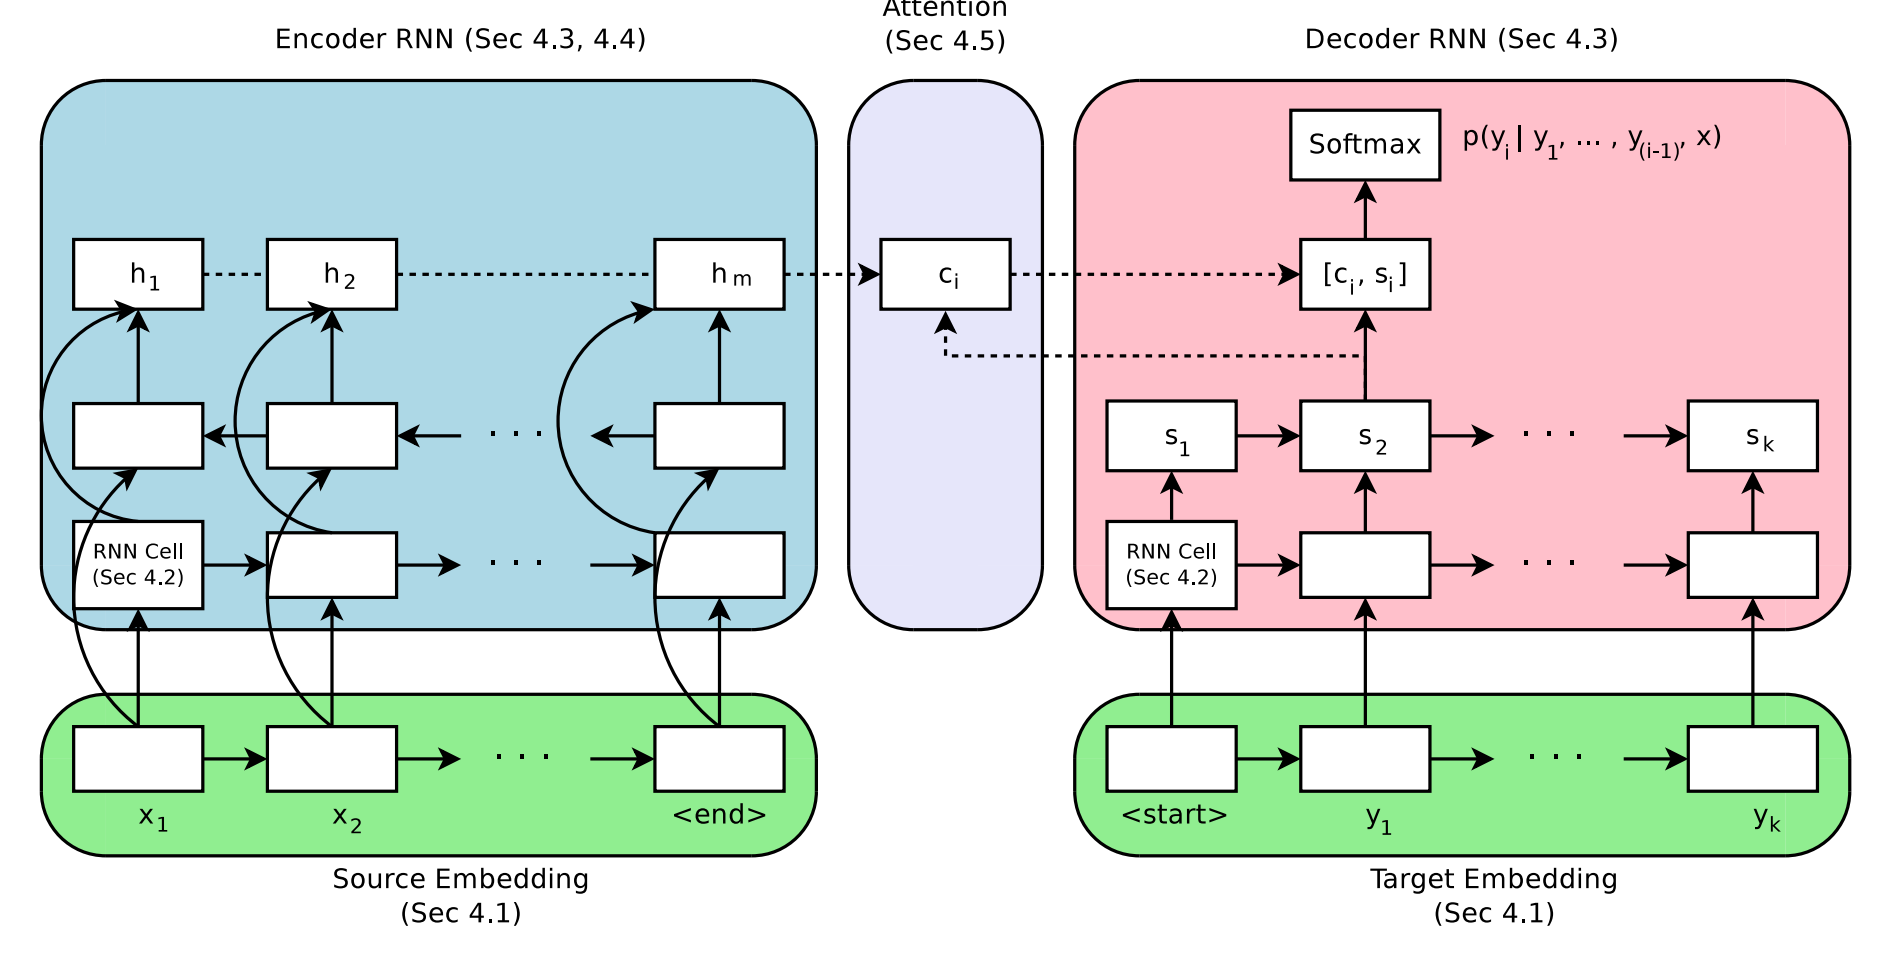

In [7]:
from IPython.display import Image
Image("images/enc_dec.png")


#citation: Britz, D., Goldie, A., Luong, M. T., & Le, Q. (2017). Massive exploration of neural machine translation architectures. arXiv preprint arXiv:1703.03906.

In [ ]:

''''
The attention layer used here is manually implemented by 

the source is available here: https://github.com/thushv89/attention_keras/blob/master/src/layers/attention.py

'''


import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM,TimeDistributed
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [ ]:
'''
The construction of the Bi-directional LSTM is based on the following sources: 

- https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/
- https://github.com/thushv89/attention_keras/blob/master/src/examples/nmt_bidirectional/model.py 
 
'''



from keras import backend as K 
K.clear_session()

#number of units in the each LSTM layer 
latent_dim = 300
embedding_dim=128

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)


forward_layer1 = LSTM(latent_dim,return_sequences=True,return_state=True)
backward_layer1 = LSTM(latent_dim,return_sequences=True,return_state=True,go_backwards=True)

bidirectional_lstm = Bidirectional(forward_layer1,backward_layer=backward_layer1)
encoder_outputs,forward_h,forward_c,backward_h,backward_c = bidirectional_lstm(enc_emb)

state_h = Concatenate()([forward_h,backward_h])
state_c = Concatenate()([forward_c,backward_c])

encoder_states = [state_h,state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 128)      1080320     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 30, 600), (N 1029600     embedding[0][0]                  
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
#Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

We’ll train the model on a batch size of 128 and validate it on the holdout set (which is 10% of our dataset):

In [ ]:
%%time
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
324/324 [==============================] - 33s 101ms/step - loss: 2.7763 - val_loss: 2.4915
Epoch 2/50
324/324 [==============================] - 31s 97ms/step - loss: 2.3594 - val_loss: 2.3603
Epoch 3/50
324/324 [==============================] - 32s 98ms/step - loss: 2.1887 - val_loss: 2.2355
Epoch 4/50
324/324 [==============================] - 31s 96ms/step - loss: 2.0755 - val_loss: 2.1485
Epoch 5/50
324/324 [==============================] - 31s 96ms/step - loss: 1.9831 - val_loss: 2.1129
Epoch 6/50
324/324 [==============================] - 31s 97ms/step - loss: 1.8977 - val_loss: 2.1115
Epoch 7/50
324/324 [==============================] - 31s 97ms/step - loss: 1.8164 - val_loss: 2.0895
Epoch 8/50
324/324 [==============================] - 31s 97ms/step - loss: 1.7354 - val_loss: 2.0862
Epoch 9/50
324/324 [==============================] - 31s 97ms/step - loss: 1.6512 - val_loss: 2.1073
Epoch 10/50
324/324 [==============================] - 31s 97ms/step - loss: 1.56

# Understanding the Diagnostic plot

Now, we will plot a few diagnostic plots to understand the behavior of the model over time:

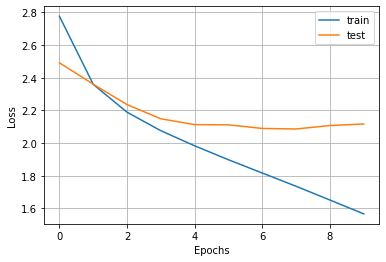

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.grid()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index
reverse_source_word_index,reverse_target_word_index

({1: 'great',
  2: 'good',
  3: 'like',
  4: 'love',
  5: 'product',
  6: 'taste',
  7: 'coffee',
  8: 'flavor',
  9: 'one',
  10: 'tea',
  11: 'would',
  12: 'best',
  13: 'price',
  14: 'really',
  15: 'buy',
  16: 'get',
  17: 'amazon',
  18: 'much',
  19: 'find',
  20: 'time',
  21: 'use',
  22: 'little',
  23: 'better',
  24: 'tried',
  25: 'food',
  26: 'well',
  27: 'delicious',
  28: 'eat',
  29: 'make',
  30: 'dog',
  31: 'loves',
  32: 'chocolate',
  33: 'also',
  34: 'try',
  35: 'order',
  36: 'bought',
  37: 'favorite',
  38: 'even',
  39: 'recommend',
  40: 'tastes',
  41: 'cup',
  42: 'found',
  43: 'sweet',
  44: 'cannot',
  45: 'nice',
  46: 'store',
  47: 'free',
  48: 'could',
  49: 'used',
  50: 'drink',
  51: 'sugar',
  52: 'perfect',
  53: 'bag',
  54: 'snack',
  55: 'way',
  56: 'dogs',
  57: 'easy',
  58: 'ever',
  59: 'go',
  60: 'ordered',
  61: 'made',
  62: 'got',
  63: 'box',
  64: 'first',
  65: 'day',
  66: 'every',
  67: 'hot',
  68: 'tasty',
  69: 'trea

# Inference

Set up the inference for the encoder and decoder:

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim*2,))
decoder_state_input_c = Input(shape=(latent_dim*2,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim*2))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

We are defining a function below which is the implementation of the inference process (which we covered [here](https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/)):

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

# Model Prodections 

- Note that the input is preprocessed, so sometimes the input might not be readable to us.

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: gave caffeine shakes heart anxiety attack plus tastes unbelievably bad stick coffee tea soda thanks 
Original summary: hour 
Predicted summary:  hour


Review: got great course good belgian chocolates better 
Original summary: would like to give it stars but 
Predicted summary:  great


Review: one best flavored coffees tried usually like flavored coffees one great serve company love 
Original summary: delicious 
Predicted summary:  great coffee


Review: salt separate area pain makes hard regulate salt putting like salt go ahead get product 
Original summary: tastes ok packaging 
Predicted summary:  salt


Review: really like product super easy order online delivered much cheaper buying gas station stocking good long drives 
Original summary: turkey jerky is great 
Predicted summary:  great taste


Review: best salad dressing delivered promptly quantities last vidalia onion dressing compares made oak hill farms sometimes find costco order front door want even orders cut shippi

# Encoder-Decoder with GRU layers

Similar Architecture to Bi-directional but with using GRU layers. 
- One layer was used for the encoder and one for the decoder. 
- Each of the encoder and decoder include embedding layers. 
- Attention mechanism is included in the structure. 
- Tensor flow is used here. 

In [ ]:
'''
The implementation of this part is based on the machine translation example, but fitted to our text summarization problem here.

https://www.tensorflow.org/tutorials/text/nmt_with_attention

'''


import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time


In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
BUFFER_SIZE = len(x_tr)
vocab_inp_size = x_voc
vocab_tar_size = y_voc
latent_dim = 300
units = latent_dim
embedding_dim=128
BATCH_SIZE = 64
steps_per_epoch = len(x_tr)//BATCH_SIZE

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_tr, y_tr)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 30]), TensorShape([64, 8]))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 30, 300)
Encoder Hidden state shape: (batch size, units) (64, 300)


In [ ]:
sample_hidden.shape

TensorShape([64, 300])

In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 300)
Attention weights shape: (batch_size, sequence_length, 1) (64, 30, 1)


In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 1989)


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
checkpoint_dir = './drive/My Drive/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([y_tokenizer.word_index['sostok']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
targ_lang = y_tokenizer
inp_lang = x_tokenizer

In [ ]:
%%time 
EPOCHS = 20


for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 3.6791
Epoch 1 Batch 100 Loss 2.5129
Epoch 1 Batch 200 Loss 2.2768
Epoch 1 Batch 300 Loss 2.2251
Epoch 1 Batch 400 Loss 2.3182
Epoch 1 Batch 500 Loss 2.1184
Epoch 1 Batch 600 Loss 2.0611
Epoch 1 Loss 2.3594
Time taken for 1 epoch 31.368271350860596 sec

Epoch 2 Batch 0 Loss 2.2557
Epoch 2 Batch 100 Loss 2.1740
Epoch 2 Batch 200 Loss 1.8480
Epoch 2 Batch 300 Loss 2.3601
Epoch 2 Batch 400 Loss 2.2619
Epoch 2 Batch 500 Loss 1.9512
Epoch 2 Batch 600 Loss 1.9731
Epoch 2 Loss 2.1018
Time taken for 1 epoch 20.201347589492798 sec

Epoch 3 Batch 0 Loss 1.7212
Epoch 3 Batch 100 Loss 2.1463
Epoch 3 Batch 200 Loss 2.1794
Epoch 3 Batch 300 Loss 1.9276
Epoch 3 Batch 400 Loss 2.1733
Epoch 3 Batch 500 Loss 1.6901
Epoch 3 Batch 600 Loss 1.9092
Epoch 3 Loss 1.9274
Time taken for 1 epoch 19.32039713859558 sec

Epoch 4 Batch 0 Loss 1.7599
Epoch 4 Batch 100 Loss 1.8453
Epoch 4 Batch 200 Loss 1.8105
Epoch 4 Batch 300 Loss 1.7138
Epoch 4 Batch 400 Loss 1.8281
Epoch 4 Batch 500 Loss 1.840

In [ ]:
max_length_targ = max_summary_len
max_length_inp = max_text_len
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  # sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['sostok']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == 'eostok':
      return result, sentence[:-1], attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [ ]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted Summary: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

Input: always house drink favorite mix sprite oh good every day mind larger bottles use much brin
Predicted Summary: still love it eostok 


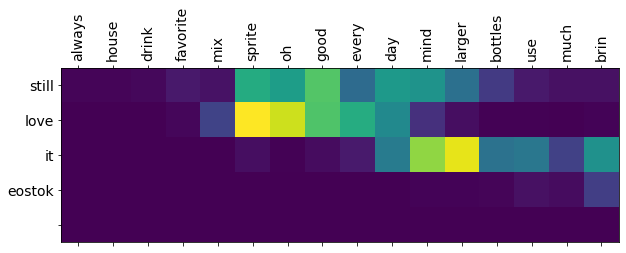

In [ ]:
translate(u'always house drink favorite mix sprite oh good every day mind larger bottles use much bring')

# Original Summary: I am an adult still love this

Input: bought jumbo greenies black lab loved way expensive regular use notice difference breath primary reason buyin
Predicted Summary: greenies are great but very good eostok 


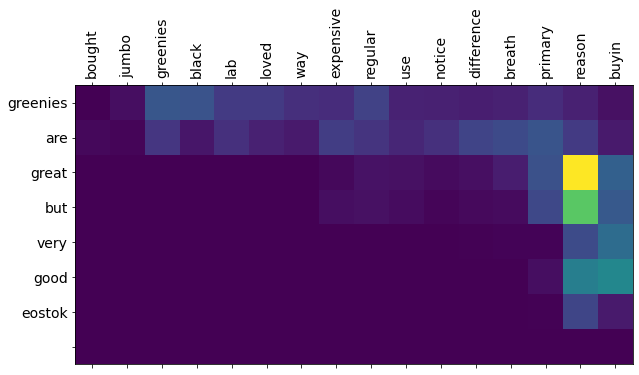

In [ ]:
translate(u'bought jumbo greenies black lab loved way expensive regular use notice difference breath primary reason buying')

Input: aware decaf coffee although showed search decaf cups intended purchase gift kept recipient drink caffeine favorite mean
Predicted Summary: not decaf eostok 


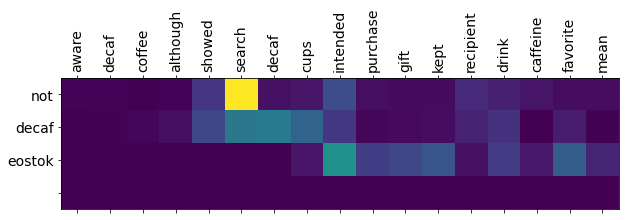

In [ ]:
translate(u'aware decaf coffee although showed search decaf cups intended purchase gift kept recipient drink caffeine favorite means')

Input: drink cups day verona italian french roast coffee wanted try lower acid version brand coffee smells tastes like vinegar totally unpalatable better drinking water acid coffee bother
Predicted Summary: agree with crack eostok 


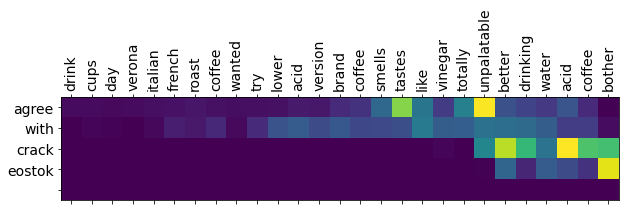

In [ ]:
translate(u'drink cups day verona italian french roast coffee wanted try lower acid version brand coffee smells tastes like vinegar totally unpalatable better drinking water acid coffee bothers')

# Encoder-Decoder with LSTM layers

Similar Architecture to GRU Architecture but with using LSTM layers here. 
- One layer was used for the encoder and one for the decoder. 
- Each of the encoder and decoder include embedding layers. 
- Attention mechanism is included in the structure. 
- For the `prepeocessing` the `start` and `end` were addded to both the reviews and the summary labels here unlike in the previous structures. 
- Tensor flow is used here. 

# Preprocessing to include adding start and end of sentences in the reviews text dataset 

In [ ]:
df=pd.DataFrame({'text':short_text,'summary':short_summary})
df['summary'] = df['summary'].apply(lambda x : 'sostok ' + x + ' eostok')
df['text'] = df['text'].apply(lambda x : 'sostok ' + x + ' eostok')
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))
thresh=4

#count of rare words
cnt=0
#vocabulary size
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)


#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)


#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)


ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

% of rare words in vocabulary: 66.11809095652872
Total Coverage of rare words: 2.6605289028591335
% of rare words in vocabulary: 78.12740675541863
Total Coverage of rare words: 5.3921899389571895


In [ ]:
'''' 

The structure of this code is based on the example 'TensorFlow Addons Networks : Sequence-to-Sequence NMT with Attention Mechanism' with fitness to 
our text summarization problem. 

https://www.tensorflow.org/addons/tutorials/networks_seq2seq_nmt


'''


import tensorflow_addons as tfa
import itertools
#ENCODER
class EncoderNetwork(tf.keras.Model):
    def __init__(self,input_vocab_size,embedding_dims, rnn_units ):
        super().__init__()
        self.encoder_embedding = tf.keras.layers.Embedding(input_dim=input_vocab_size,
                                                           output_dim=embedding_dims)
        self.encoder_rnnlayer = tf.keras.layers.LSTM(rnn_units,return_sequences=True, 
                                                     return_state=True )
    
#DECODER
class DecoderNetwork(tf.keras.Model):
    def __init__(self,output_vocab_size, embedding_dims, rnn_units):
        super().__init__()
        self.decoder_embedding = tf.keras.layers.Embedding(input_dim=output_vocab_size,
                                                           output_dim=embedding_dims) 
        self.dense_layer = tf.keras.layers.Dense(output_vocab_size)
        self.decoder_rnncell = tf.keras.layers.LSTMCell(rnn_units)
        # Sampler
        self.sampler = tfa.seq2seq.sampler.TrainingSampler()
        # Create attention mechanism with memory = None
        self.attention_mechanism = self.build_attention_mechanism(dense_units,None,BATCH_SIZE*[Tx])
        self.rnn_cell =  self.build_rnn_cell(BATCH_SIZE)
        self.decoder = tfa.seq2seq.BasicDecoder(self.rnn_cell, sampler= self.sampler,
                                                output_layer=self.dense_layer)

    def build_attention_mechanism(self, units,memory, memory_sequence_length):
        return tfa.seq2seq.LuongAttention(units, memory = memory, 
                                          memory_sequence_length=memory_sequence_length)
        #return tfa.seq2seq.BahdanauAttention(units, memory = memory, memory_sequence_length=memory_sequence_length)

    # wrap decodernn cell  
    def build_rnn_cell(self, batch_size ):
        rnn_cell = tfa.seq2seq.AttentionWrapper(self.decoder_rnncell, self.attention_mechanism,
                                                attention_layer_size=dense_units)
        return rnn_cell
    
    def build_decoder_initial_state(self, batch_size, encoder_state,Dtype):
        decoder_initial_state = self.rnn_cell.get_initial_state(batch_size = batch_size, 
                                                                dtype = Dtype)
        decoder_initial_state = decoder_initial_state.clone(cell_state=encoder_state) 
        return decoder_initial_state

input_vocab_size = x_voc
output_vocab_size = y_voc
rnn_units = latent_dim
Tx = max_text_len
Ty = max_summary_len
dense_units = sample_hidden.shape[1]
embedding_dims = embedding_dim
encoderNetwork = EncoderNetwork(input_vocab_size,embedding_dims, rnn_units)
decoderNetwork = DecoderNetwork(output_vocab_size,embedding_dims, rnn_units)
optimizer = tf.keras.optimizers.Adam()


In [ ]:
def loss_function(y_pred, y):
   
    #shape of y [batch_size, ty]
    #shape of y_pred [batch_size, Ty, output_vocab_size] 
    sparsecategoricalcrossentropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                                                  reduction='none')
    loss = sparsecategoricalcrossentropy(y_true=y, y_pred=y_pred)
    mask = tf.logical_not(tf.math.equal(y,0))   #output 0 for y=0 else output 1
    mask = tf.cast(mask, dtype=loss.dtype)
    loss = mask* loss
    loss = tf.reduce_mean(loss)
    return loss


def train_step(input_batch, output_batch,encoder_initial_cell_state):
    #initialize loss = 0
    loss = 0
    with tf.GradientTape() as tape:
        encoder_emb_inp = encoderNetwork.encoder_embedding(input_batch)
        a, a_tx, c_tx = encoderNetwork.encoder_rnnlayer(encoder_emb_inp, 
                                                        initial_state =encoder_initial_cell_state)

        #[last step activations,last memory_state] of encoder passed as input to decoder Network
        
         
        # Prepare correct Decoder input & output sequence data
        decoder_input = output_batch[:,:-1] # ignore <end>
        #compare logits with timestepped +1 version of decoder_input
        decoder_output = output_batch[:,1:] #ignore <start>


        # Decoder Embeddings
        decoder_emb_inp = decoderNetwork.decoder_embedding(decoder_input)

        #Setting up decoder memory from encoder output and Zero State for AttentionWrapperState
        decoderNetwork.attention_mechanism.setup_memory(a)
        decoder_initial_state = decoderNetwork.build_decoder_initial_state(BATCH_SIZE,
                                                                           encoder_state=[a_tx, c_tx],
                                                                           Dtype=tf.float32)
        
        #BasicDecoderOutput        
        outputs, _, _ = decoderNetwork.decoder(decoder_emb_inp,initial_state=decoder_initial_state,
                                               sequence_length=BATCH_SIZE*[Ty-1])

        logits = outputs.rnn_output
        #Calculate loss

        loss = loss_function(logits, decoder_output)

    #Returns the list of all layer variables / weights.
    variables = encoderNetwork.trainable_variables + decoderNetwork.trainable_variables  
    # differentiate loss wrt variables
    gradients = tape.gradient(loss, variables)

    #grads_and_vars – List of(gradient, variable) pairs.
    grads_and_vars = zip(gradients,variables)
    optimizer.apply_gradients(grads_and_vars)
    return loss

In [ ]:
#RNN LSTM hidden and memory state initializer
def initialize_initial_state():
        return [tf.zeros((BATCH_SIZE, rnn_units)), tf.zeros((BATCH_SIZE, rnn_units))]

In [ ]:
%%time
epochs = 15
for i in range(1, epochs+1):

    encoder_initial_cell_state = initialize_initial_state()
    total_loss = 0.0

    for ( batch , (input_batch, output_batch)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(input_batch, output_batch, encoder_initial_cell_state)
        total_loss += batch_loss
        if (batch+1)%5 == 0:
            print("total loss: {} epoch {} batch {} ".format(batch_loss.numpy(), i, batch+1))

total loss: 4.389447212219238 epoch 1 batch 5 
total loss: 3.23772931098938 epoch 1 batch 10 
total loss: 3.196272611618042 epoch 1 batch 15 
total loss: 2.9262967109680176 epoch 1 batch 20 
total loss: 2.8626158237457275 epoch 1 batch 25 
total loss: 2.9776859283447266 epoch 1 batch 30 
total loss: 2.9192652702331543 epoch 1 batch 35 
total loss: 2.8841712474823 epoch 1 batch 40 
total loss: 2.9605228900909424 epoch 1 batch 45 
total loss: 2.8403849601745605 epoch 1 batch 50 
total loss: 3.0781567096710205 epoch 1 batch 55 
total loss: 2.729379892349243 epoch 1 batch 60 
total loss: 2.5969207286834717 epoch 1 batch 65 
total loss: 2.6091675758361816 epoch 1 batch 70 
total loss: 2.582998752593994 epoch 1 batch 75 
total loss: 3.027207851409912 epoch 1 batch 80 
total loss: 2.622081756591797 epoch 1 batch 85 
total loss: 2.6710565090179443 epoch 1 batch 90 
total loss: 2.8349690437316895 epoch 1 batch 95 
total loss: 2.6523454189300537 epoch 1 batch 100 
total loss: 3.1140551567077637 

In [ ]:

input_raw='always house drink favorite mix sprite oh good every day mind larger bottles use much bring'
input_lines = ['sostok '+input_raw+'']
input_sequences = [[x_tokenizer.word_index[w] for w in line.split(' ')] for line in input_lines]
input_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_sequences,maxlen=Tx, padding='post')
inp = tf.convert_to_tensor(input_sequences)
inference_batch_size = input_sequences.shape[0]
encoder_initial_cell_state = [tf.zeros((inference_batch_size, rnn_units)),
                              tf.zeros((inference_batch_size, rnn_units))]

encoder_emb_inp = encoderNetwork.encoder_embedding(inp)
a, a_tx, c_tx = encoderNetwork.encoder_rnnlayer(encoder_emb_inp,
                                                initial_state =encoder_initial_cell_state)

start_tokens = tf.fill([inference_batch_size],x_tokenizer.word_index['sostok'])

end_token = x_tokenizer.word_index['eostok']     
greedy_sampler = tfa.seq2seq.GreedyEmbeddingSampler()   
decoder_input = tf.expand_dims([x_tokenizer.word_index['sostok']]* inference_batch_size,1)
decoder_emb_inp = decoderNetwork.decoder_embedding(decoder_input)            
decoder_instance = tfa.seq2seq.BasicDecoder(cell = decoderNetwork.rnn_cell, sampler = greedy_sampler,
                                            output_layer=decoderNetwork.dense_layer)
decoderNetwork.attention_mechanism.setup_memory(a)
decoder_initial_state = decoderNetwork.build_decoder_initial_state(inference_batch_size,
                                                                   encoder_state=[a_tx, c_tx],
                                                                   Dtype=tf.float32)
maximum_iterations = tf.round(tf.reduce_max(Tx) * 2)
decoder_embedding_matrix = decoderNetwork.decoder_embedding.variables[0] 
(first_finished, first_inputs,first_state) = decoder_instance.initialize(decoder_embedding_matrix,
                             start_tokens = start_tokens,
                             end_token=end_token,
                             initial_state = decoder_initial_state)

inputs = first_inputs
state = first_state  
predictions = np.empty((inference_batch_size,0), dtype = np.int32)                                                                             
for j in range(maximum_iterations):
    outputs, next_state, next_inputs, finished = decoder_instance.step(j,inputs,state)
    inputs = next_inputs
    state = next_state
    outputs = np.expand_dims(outputs.sample_id,axis = -1)
    predictions = np.append(predictions, outputs, axis = -1)


print("Review Sentence:")
print(input_raw)
print("Summary Translation:")
for i in range(len(predictions)):
    line = predictions[i,:]
    seq = list(itertools.takewhile( lambda index: index !=2, line))
    print(" ".join( [x_tokenizer.index_word[w] for w in seq]))

Review Sentence:
always house drink favorite mix sprite oh good every day mind larger bottles use much bring
Summary Translation:
even


In [ ]:
#THE PRINTED RESULT BELOW

# Review Sentence:
# found spice blend dallas years back tell restaurant using grilled shrimp like cajun spice grilling fish recommend store dry place replace every year least lose flavor
# Summary Translation:
# great price


input_raw='found spice blend dallas years back tell restaurant using grilled shrimp like cajun spice grilling fish recommend store dry place replace every year least lose flavor'
input_lines = ['sostok '+input_raw+'']
input_sequences = [[x_tokenizer.word_index[w] for w in line.split(' ')] for line in input_lines]
input_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_sequences,maxlen=Tx, padding='post')
inp = tf.convert_to_tensor(input_sequences)
inference_batch_size = input_sequences.shape[0]
encoder_initial_cell_state = [tf.zeros((inference_batch_size, rnn_units)),
                              tf.zeros((inference_batch_size, rnn_units))]

encoder_emb_inp = encoderNetwork.encoder_embedding(inp)
a, a_tx, c_tx = encoderNetwork.encoder_rnnlayer(encoder_emb_inp,
                                                initial_state =encoder_initial_cell_state)

start_tokens = tf.fill([inference_batch_size],x_tokenizer.word_index['sostok'])

end_token = x_tokenizer.word_index['eostok']     
greedy_sampler = tfa.seq2seq.GreedyEmbeddingSampler()   
decoder_input = tf.expand_dims([x_tokenizer.word_index['sostok']]* inference_batch_size,1)
decoder_emb_inp = decoderNetwork.decoder_embedding(decoder_input)            
decoder_instance = tfa.seq2seq.BasicDecoder(cell = decoderNetwork.rnn_cell, sampler = greedy_sampler,
                                            output_layer=decoderNetwork.dense_layer)
decoderNetwork.attention_mechanism.setup_memory(a)
decoder_initial_state = decoderNetwork.build_decoder_initial_state(inference_batch_size,
                                                                   encoder_state=[a_tx, c_tx],
                                                                   Dtype=tf.float32)
maximum_iterations = tf.round(tf.reduce_max(Tx) * 2)
decoder_embedding_matrix = decoderNetwork.decoder_embedding.variables[0] 
(first_finished, first_inputs,first_state) = decoder_instance.initialize(decoder_embedding_matrix,
                             start_tokens = start_tokens,
                             end_token=end_token,
                             initial_state = decoder_initial_state)

inputs = first_inputs
state = first_state  
predictions = np.empty((inference_batch_size,0), dtype = np.int32)                                                                             
for j in range(maximum_iterations):
    outputs, next_state, next_inputs, finished = decoder_instance.step(j,inputs,state)
    inputs = next_inputs
    state = next_state
    outputs = np.expand_dims(outputs.sample_id,axis = -1)
    predictions = np.append(predictions, outputs, axis = -1)


print("Review Sentence:")
print(input_raw)
print("Summary Translation:")
for i in range(len(predictions)):
    line = predictions[i,:]
    seq = list(itertools.takewhile( lambda index: index !=2, line))
    print(" ".join( [x_tokenizer.index_word[w] for w in seq]))

Review Sentence:
found spice blend dallas years back tell restaurant using grilled shrimp like cajun spice grilling fish recommend store dry place replace every year least lose flavor
Summary Translation:
great price


In [ ]:
input_raw='drink cups day verona italian french roast coffee wanted try lower acid version brand coffee smells tastes like vinegar totally unpalatable better drinking water acid coffee bothers'

input_lines = ['sostok '+input_raw+'']
input_sequences = [[x_tokenizer.word_index[w] for w in line.split(' ')] for line in input_lines]
input_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_sequences,maxlen=Tx, padding='post')
inp = tf.convert_to_tensor(input_sequences)
inference_batch_size = input_sequences.shape[0]
encoder_initial_cell_state = [tf.zeros((inference_batch_size, rnn_units)),
                              tf.zeros((inference_batch_size, rnn_units))]

encoder_emb_inp = encoderNetwork.encoder_embedding(inp)
a, a_tx, c_tx = encoderNetwork.encoder_rnnlayer(encoder_emb_inp,
                                                initial_state =encoder_initial_cell_state)

start_tokens = tf.fill([inference_batch_size],x_tokenizer.word_index['sostok'])

end_token = x_tokenizer.word_index['eostok']     
greedy_sampler = tfa.seq2seq.GreedyEmbeddingSampler()   
decoder_input = tf.expand_dims([x_tokenizer.word_index['sostok']]* inference_batch_size,1)
decoder_emb_inp = decoderNetwork.decoder_embedding(decoder_input)            
decoder_instance = tfa.seq2seq.BasicDecoder(cell = decoderNetwork.rnn_cell, sampler = greedy_sampler,
                                            output_layer=decoderNetwork.dense_layer)
decoderNetwork.attention_mechanism.setup_memory(a)
decoder_initial_state = decoderNetwork.build_decoder_initial_state(inference_batch_size,
                                                                   encoder_state=[a_tx, c_tx],
                                                                   Dtype=tf.float32)
maximum_iterations = tf.round(tf.reduce_max(Tx) * 2)
decoder_embedding_matrix = decoderNetwork.decoder_embedding.variables[0] 
(first_finished, first_inputs,first_state) = decoder_instance.initialize(decoder_embedding_matrix,
                             start_tokens = start_tokens,
                             end_token=end_token,
                             initial_state = decoder_initial_state)

inputs = first_inputs
state = first_state  
predictions = np.empty((inference_batch_size,0), dtype = np.int32)                                                                             
for j in range(maximum_iterations):
    outputs, next_state, next_inputs, finished = decoder_instance.step(j,inputs,state)
    inputs = next_inputs
    state = next_state
    outputs = np.expand_dims(outputs.sample_id,axis = -1)
    predictions = np.append(predictions, outputs, axis = -1)


print("Review Sentence:")
print(input_raw)
print("Summary Translation:")
for i in range(len(predictions)):
    line = predictions[i,:]
    seq = list(itertools.takewhile( lambda index: index !=2, line))
    print(" ".join( [x_tokenizer.index_word[w] for w in seq]))

Review Sentence:
drink cups day verona italian french roast coffee wanted try lower acid version brand coffee smells tastes like vinegar totally unpalatable better drinking water acid coffee bothers
Summary Translation:
like love


In [ ]:

input_raw='aware decaf coffee although showed search decaf cups intended purchase gift kept recipient drink caffeine favorite means'

input_lines = ['sostok '+input_raw+'']
input_sequences = [[x_tokenizer.word_index[w] for w in line.split(' ')] for line in input_lines]
input_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_sequences,maxlen=Tx, padding='post')
inp = tf.convert_to_tensor(input_sequences)
inference_batch_size = input_sequences.shape[0]
encoder_initial_cell_state = [tf.zeros((inference_batch_size, rnn_units)),
                              tf.zeros((inference_batch_size, rnn_units))]

encoder_emb_inp = encoderNetwork.encoder_embedding(inp)
a, a_tx, c_tx = encoderNetwork.encoder_rnnlayer(encoder_emb_inp,
                                                initial_state =encoder_initial_cell_state)

start_tokens = tf.fill([inference_batch_size],x_tokenizer.word_index['sostok'])

end_token = x_tokenizer.word_index['eostok']     
greedy_sampler = tfa.seq2seq.GreedyEmbeddingSampler()   
decoder_input = tf.expand_dims([x_tokenizer.word_index['sostok']]* inference_batch_size,1)
decoder_emb_inp = decoderNetwork.decoder_embedding(decoder_input)            
decoder_instance = tfa.seq2seq.BasicDecoder(cell = decoderNetwork.rnn_cell, sampler = greedy_sampler,
                                            output_layer=decoderNetwork.dense_layer)
decoderNetwork.attention_mechanism.setup_memory(a)
decoder_initial_state = decoderNetwork.build_decoder_initial_state(inference_batch_size,
                                                                   encoder_state=[a_tx, c_tx],
                                                                   Dtype=tf.float32)
maximum_iterations = tf.round(tf.reduce_max(Tx) * 2)
decoder_embedding_matrix = decoderNetwork.decoder_embedding.variables[0] 
(first_finished, first_inputs,first_state) = decoder_instance.initialize(decoder_embedding_matrix,
                             start_tokens = start_tokens,
                             end_token=end_token,
                             initial_state = decoder_initial_state)

inputs = first_inputs
state = first_state  
predictions = np.empty((inference_batch_size,0), dtype = np.int32)                                                                             
for j in range(maximum_iterations):
    outputs, next_state, next_inputs, finished = decoder_instance.step(j,inputs,state)
    inputs = next_inputs
    state = next_state
    outputs = np.expand_dims(outputs.sample_id,axis = -1)
    predictions = np.append(predictions, outputs, axis = -1)


print("Review Sentence:")
print(input_raw)
print("Summary Translation:")
for i in range(len(predictions)):
    line = predictions[i,:]
    seq = list(itertools.takewhile( lambda index: index !=2, line))
    print(" ".join( [x_tokenizer.index_word[w] for w in seq]))


Review Sentence:
aware decaf coffee although showed search decaf cups intended purchase gift kept recipient drink caffeine favorite means
Summary Translation:
coffee glad


# Evaluation using ROUGE 

- ROUGE stands for `Recall-Oriented Understudy for Gisting Evaluation`.
- Used to compare automatically generated texts against a `predefined reference`.
- There are different variations of ROUGE such as `ROUGE-N`, `ROUGE-L` and more [3]. 
- The `N` in ROUGE stands for `N` grams used to evaluate summarization. 
- The `L` stands for Least Common Sequence. 
- The evaluation is then based on finding the `precision, recall and F1 score` from the counted common grams (or windows). 


$$ROUGE_N = \frac{\sum_{s \in\{ReferenceSummaries\}} \sum_{gram_n \in s} Count_{match}(gram_n)}{\sum_{S \in \{ReferenceSummaries\}} \sum_{gram_n \in s} Count_(gram_n)}$$


- For evaluation with ROUGE-L which finds `The least common Sequence` instead of the `N-Grams`. Then the evaluation is based is estimated as follows:  
$$
Precision = \frac{LeastCommonSequence(ReferenceSummary,Summary)}{ReferencSummaryLength}
$$

$$
Recall = \frac{LeastCommonSequence(Summary,ReferenceSummary)}{SummaryLength}
$$

$$
F = \frac{(1+\beta^2)Recall_{lcs}*Precision_{lcs}}{Recall_{lcs}+\beta^2*Precision_{lcs}}
$$




# ROUGE for Extractive Summary 

- A manually written summary by team members is used first, then another summary from the dataset (the true summary) was used again. 

In [ ]:
text = 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'
reference = 'The quality of the Vitality canned dog products is good.'

ts = Summarizer(text)
text,summary = ts.summarize(0.4)

rouge = Rouge()
scores = rouge.get_scores(reference, summary)

print("Text:",text)
print("Reference Summary:",reference)
print("Predicted Summary:",summary)
print("Evaluation:")
scores

Text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Reference Summary: The quality of the Vitality canned dog products is good.
Predicted Summary: The product looks more like a stew than a processed meat and it smells better.
Evaluation:


[{'rouge-1': {'f': 0.07999999520000028, 'p': 0.1, 'r': 0.06666666666666667},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.08333332847222251, 'p': 0.1, 'r': 0.07142857142857142}}]

From the obtained results, the ROUGE approach doesn't tend to give high scores to predictive summaries due to the less common words between refrence summaries and the predicted summaries. 
- To garauntee a good evaluation by ROUGE, the reference result must be taken literally from the corpus with the exact wording, or at least to contain the same word style as in the summarized corpus. 

# ROUGE for Abstractive Summary 

In [ ]:
text = 'truffle oil quite good prefer brand france urbani italy expensive oh delicious tried black white good black bit stronger pungent event healthy alternative butter enjoy'
reference = 'delicious but not the best'
summary = 'delicious'

rouge = Rouge()
scores = rouge.get_scores(reference, summary)

print("Text:",text)
print("Reference Summary:",reference)
print("Predicted Summary:",summary)
print("Evaluation:")
scores

Text: truffle oil quite good prefer brand france urbani italy expensive oh delicious tried black white good black bit stronger pungent event healthy alternative butter enjoy
Reference Summary: delicious but not the best
Predicted Summary: delicious
Evaluation:


[{'rouge-1': {'f': 0.33333333055555564, 'p': 0.2, 'r': 1.0},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.33333333055555564, 'p': 0.2, 'r': 1.0}}]

In [ ]:
text = 'absolutely loves apple chicken happy hips looks forward one morning one night gets soooo excited would eat allowed '
reference = 'healthy treats'
summary = 'my dog loves these'

rouge = Rouge()
scores = rouge.get_scores(reference, summary)

print("Text:",text)
print("Reference Summary:",reference)
print("Predicted Summary:",summary)
print("Evaluation:")
scores

Text: absolutely loves apple chicken happy hips looks forward one morning one night gets soooo excited would eat allowed 
Reference Summary: healthy treats
Predicted Summary: my dog loves these
Evaluation:


[{'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}]

- From the obtained results, it can be seen that ROUGE using word sequences based comparison can be less efficient in evaluating abstractive summaries.  
- Therefore, different similarity measures may do the job better, such as cosine  with embedding based representation of the summaries. 

# Conclusion

- Frequency driven extractive summarization tasks are simple, and easy to implement. 
- However, they require large corpus to estimate the correct summary as they depend on the frequency of occurance of each word. 
- In addition, no understanding of curpos is invloved in this process. There
- Abstractive summarization approaches sound intuitive and understanding of whats given to it. 
- However, implementation is complicated and many experiments required to obtain best results possible. 
- Human based evaluation is still essential for summarization tasks. 
- ROUGE can be used for extractive summarization but not preferred for abstractive summarization. 


# Future work 

- Different Extractive Summarization implementation using Recurrent Neural Networks and evaluate them. 
- Improvement of  the abstractive summarization structures for better performances. 
- Embedding based evaluation approaches for extractive and abstractive summarization. 

# References

- [1] Allahyari, M., Pouriyeh, S., Assefi, M., Safaei, S., Trippe, E. D., Gutierrez, J. B., & Kochut, K. (2017). Text summarization techniques: a brief survey. arXiv preprint arXiv:1707.02268. 
- [2] Nikolov, N. I., Pfeiffer, M., & Hahnloser, R. H. (2018). Data-driven summarization of scientific articles. arXiv preprint arXiv:1804.08875.
- [3] Lin, C. Y. (2004, July). Rouge: A package for automatic evaluation of summaries. In Text summarization branches out (pp. 74-81).
- [4] Britz, D., Goldie, A., Luong, M. T., & Le, Q. (2017). Massive exploration of neural machine translation architectures. arXiv preprint arXiv:1703.03906.